In [4]:
#Dataset handlers
import pandas as pd
import numpy as np

#Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  RandomizedSearchCV, train_test_split

from xgboost import XGBClassifier
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

  Using cached catboost-1.0.4-cp38-none-manylinux1_x86_64.whl (76.1 MB)
  Using cached plotly-5.6.0-py2.py3-none-any.whl (27.7 MB)


In [52]:
#reading the dataset using pandas
heart_dataset = pd.read_csv("./data/cleveland_short.csv")
print (heart_dataset.head(5))
print (heart_dataset.shape)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

   ca  thal  num  
0   0     6    0  
1   3     3    2  
2   2     7    1  
3   0     3    0  
4   0     3    0  
(282, 14)


In [53]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for dataset', fontsize=15)
    plt.show()

/tmp/ipykernel_128/1527715875.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.

/tmp/ipykernel_128/1527715875.py:14: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



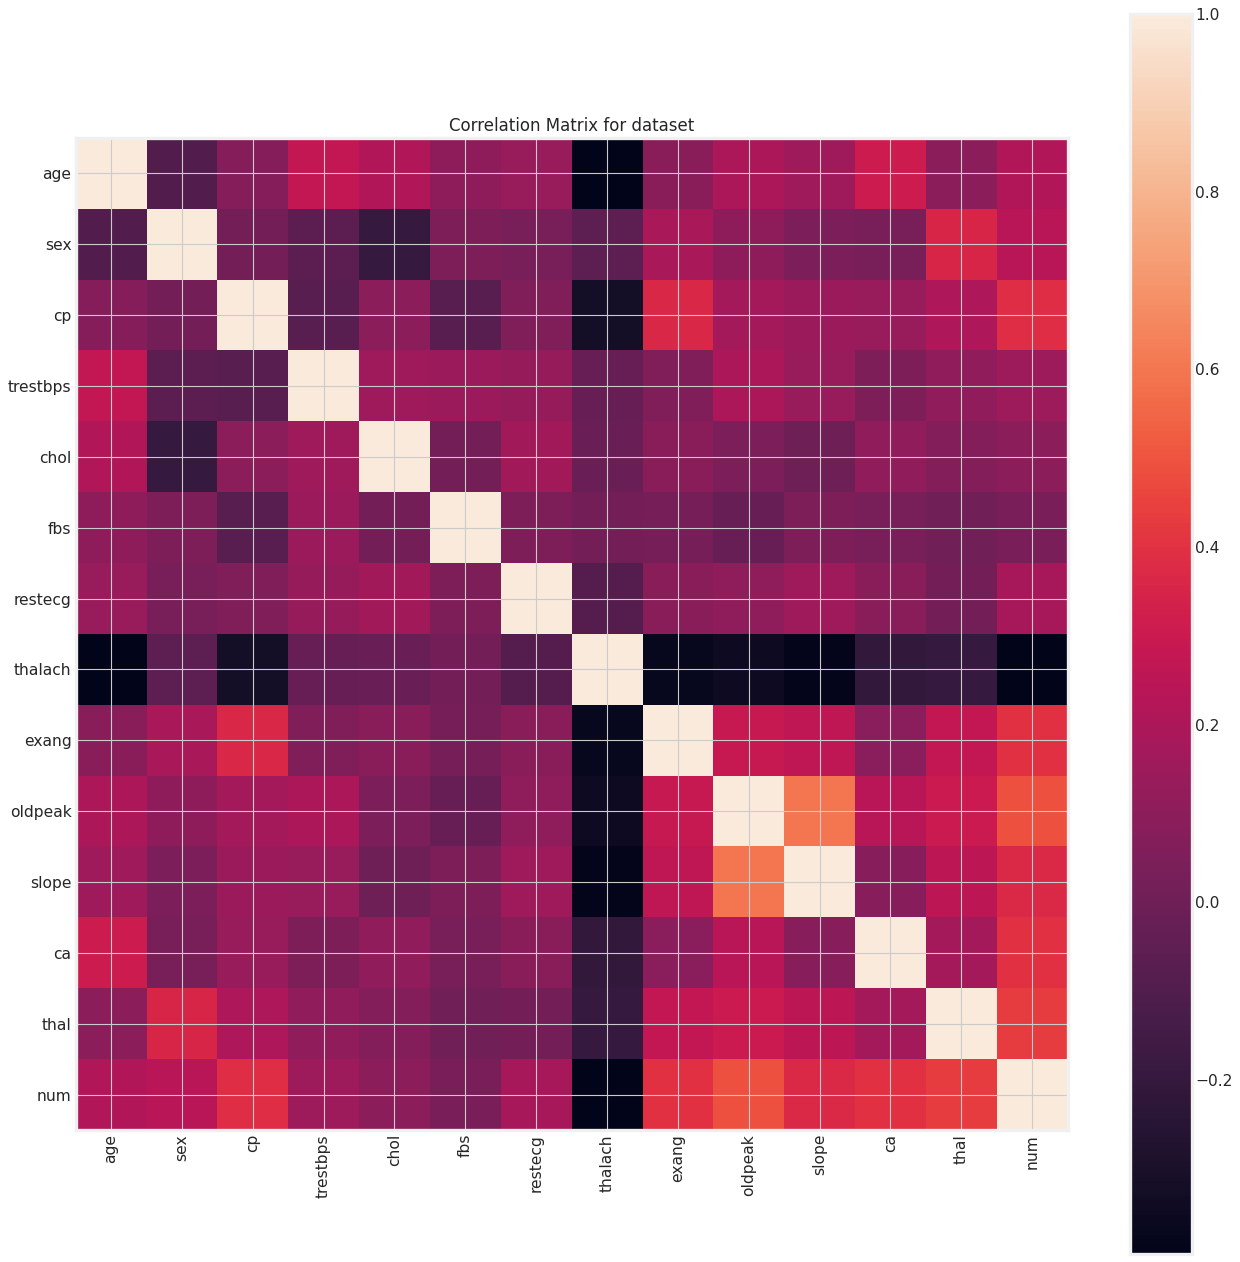

In [54]:
plotCorrelationMatrix(heart_dataset, 20)

In [55]:
!pip install TPOT


In [56]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# import missingno as msno
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

# import cufflinks as cf 

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")



from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import  RadiusNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import NuSVC
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb


from sklearn.linear_model import RidgeClassifier
from catboost import Pool, CatBoostClassifier, cv
# import lightgbm as lgb
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)  
import plotly.figure_factory as ff

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import random

In [57]:
table = ff.create_table(heart_dataset.head().round(3))
iplot(table,filename='jupyter-table1')
heart_dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [58]:
X = heart_dataset.iloc[:, heart_dataset.columns != 'num'].values
y = heart_dataset.iloc[:, heart_dataset.columns == 'num'].values
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

/mnt/c/Users/meivenkatkumar/fyp/fyp1/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [61]:
print(x_train)

Model = KNeighborsClassifier(n_neighbors=8)
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

[[43.  1.  3. ...  1.  1.  3.]
 [54.  1.  4. ...  2.  1.  7.]
 [56.  1.  4. ...  2.  1.  3.]
 ...
 [59.  1.  4. ...  1.  1.  7.]
 [61.  1.  4. ...  1.  1.  7.]
 [57.  0.  4. ...  1.  1.  3.]]
              precision    recall  f1-score   support

           0       0.59      0.91      0.72        47
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         5

    accuracy                           0.51        85
   macro avg       0.12      0.18      0.14        85
weighted avg       0.33      0.51      0.40        85

[[43  3  0  1  0]
 [13  0  0  0  0]
 [ 3  2  0  2  0]
 [10  2  1  0  0]
 [ 4  1  0  0  0]]
accuracy is 0.5058823529411764


/mnt/c/Users/meivenkatkumar/fyp/fyp1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/mnt/c/Users/meivenkatkumar/fyp/fyp1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/mnt/c/Users/meivenkatkumar/fyp/fyp1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



 Important Feature indexes in the ensemble 
' 0 ' - 0.00956205775482884
' 6 ' - 0.028560080195192083
' 7 ' - 0.032271944922547334
' 12 ' - 0.020536692223439214
' 17 ' - 0.01961308437212052
' 20 ' - 0.019458453193392955
' 24 ' - 0.01323977227591685
' 31 ' - 0.02680273764611114
' 33 ' - 0.00956205775482884
' 37 ' - 0.012550200803212853
' 39 ' - 0.043254937833251135
' 40 ' - 0.08839799480464322
' 41 ' - 0.17227026784039356
' 42 ' - 0.13616303432761198
' 43 ' - 0.146597642417923
' 44 ' - 0.1432137829664364
' 45 ' - 0.07794525866815022


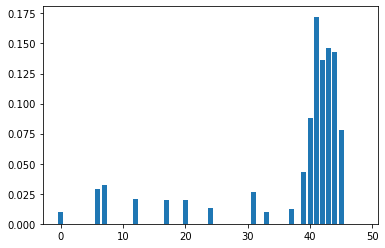

In [1]:
import pickle
import pandas as pd 
import matplotlib.pyplot as pyplot
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

with open('models/soft_ensemble.pkl', 'rb') as f:
    clf = pickle.load(f)

imp_featuresInd = []
for model in clf.estimators_:
    if model.__class__.__name__ == 'DecisionTreeClassifier':
        importance = model.feature_importances_
        print("\033[1m Important Feature indexes in the ensemble \033[0m")
        for i in range(len(importance)):
            if importance[i] != 0: 
                print ("'",i,"'", end = " - ")
                print (importance[i])
                imp_featuresInd.append(i)
        pyplot.bar([x for x in range(len(importance))], importance)
        pyplot.show()

In [2]:
clf.estimators_

[SVC(C=0.01, kernel='linear', probability=True),
 DecisionTreeClassifier(),
 AdaBoostClassifier(n_estimators=300)]